This this one SVD++ class, it has train, predict , test function to do the main job.
The fucntion get_train_test_input is a helper function to get the input data for the SVD class to train and predict
The leaving part is the cross validation for five pairs of train and test datasets, and it will generate one figure showing the MSE change.
Run every cell sequential will generate the result in our report

In [0]:
from collections import defaultdict
import numpy as np
from sklearn.metrics import mean_squared_error
class SVDpp():
    def __init__(self,mat,K=20):
        self.mat=mat
        self.K=K
        self.bi=defaultdict(float)
        self.bu=defaultdict(float)
        self.qi=defaultdict(np.ndarray)
        self.pu=defaultdict(np.ndarray)
        self.avg=np.mean(self.mat[:,2])
        self.y=defaultdict(np.ndarray)
        self.u_dict=defaultdict(list)
        for i in range(self.mat.shape[0]):
            user_id=self.mat[i,0]
            movie_id=self.mat[i,1]
            self.u_dict[user_id].append(movie_id)
            self.bi[movie_id]=0
            self.bu[user_id]=0
            self.qi[movie_id]=np.random.random((self.K,1))/10*np.sqrt(self.K)
            self.pu[user_id]=np.random.random((self.K,1))/10*np.sqrt(self.K)
            self.y[movie_id]=np.zeros((self.K,1))+.1
    def predict(self,user_id,movie_id):
        try:
            qi=self.qi[movie_id]
        except:
            qi=np.zeros((self.K,1))
        try:
            pu=self.pu[user_id]
        except:
            pu=p.zeros((self.K,1))
        try:
            y=self.y[user_id]=np.zeros((self.K,1))
        except:
            y=np.zeros((self.K,1))
        u_impl_prf,sqrt_Nu=self.get_latent_bias(user_id, movie_id)
        rating=self.avg+self.bi[movie_id]+self.bu[user_id]+np.sum(qi*(pu+u_impl_prf))
        if rating>5:
            rating=5
        if rating<1:
            rating=1
        return rating
    def get_latent_bias(self,user_id,movie_id):
        number_of_um=len(self.u_dict[user_id])
        y_u=np.zeros((self.K,1))
        if number_of_um:
            for i in self.u_dict[user_id]:
                y_u += self.y[i]
            u_impl_prf = y_u / np.sqrt(number_of_um)
        else:
            u_impl_prf=y_u
        return u_impl_prf,np.sqrt(number_of_um)
    def train(self,steps=30,gamma=0.04,Lambda=0.15):
        for step in range(steps):
            print('setp:',step+1,"is running")
            np.random.shuffle(self.mat)
            rmse=0.0
            #update parameters in every interation
            for i in range(self.mat.shape[0]):
                user_id=self.mat[i,0]
                movie_id=self.mat[i,1]
                u_impl_prf,sqrt_Nu=self.get_latent_bias(user_id,movie_id)
                eui=self.mat[i,2]-self.predict(user_id, movie_id)
                rmse+=eui**2
                self.bu[user_id]+=gamma*(eui-Lambda*self.bu[user_id])  
                self.bi[movie_id]+=gamma*(eui-Lambda*self.bi[movie_id])
                self.pu[user_id]+=gamma*(eui*self.qi[movie_id]-Lambda*self.pu[user_id])
                self.qi[movie_id]+=gamma*(eui*(self.pu[user_id]+u_impl_prf)-Lambda*self.qi[movie_id])
                for j in self.u_dict[user_id]:
                    self.y[j]+=gamma*(eui*self.qi[j]/sqrt_Nu-Lambda*self.y[j]) 
            #shrinking the learning rate after each iteration
            gamma=0.93*gamma
            print('rmse is',np.sqrt(rmse/self.mat.shape[0]))   
    def test(self,test_data):
        print('test data size',test_data.shape)
        rmse=0.0
        predict = []
        target = test_data[:,2]
        for i in range(test_data.shape[0]):
            uid=test_data[i,0]
            iid=test_data[i,1]
            predict.append(self.predict(uid, iid))
        return mean_squared_error(target,predict)


In [0]:
def get_train_test_input(train_file_name,test_file_name):
    import pandas as pd
    #get train data without timestamp
    train_df=pd.read_table(train_file_name,sep='\t',header=None,names=['userId','movieId','rating','timestamp'])
    train_df.drop(["timestamp"],axis=1,inplace=True)
    train_data=train_df.astype(int).values
    #get test data without timestamp
    test_df=pd.read_table(test_file_name,sep='\t',header=None,names=['userId','movieId','rating','timestamp'])
    test_df.drop(["timestamp"],axis=1,inplace=True)
    test_data=test_df.astype(int).values
    return train_data,test_data

setp: 1 is running
rmse is 1.0063187038779113
setp: 2 is running
rmse is 0.93968504681826
setp: 3 is running
rmse is 0.9270879213267009
setp: 4 is running
rmse is 0.919713744116167
setp: 5 is running
rmse is 0.9138342707526501
setp: 6 is running
rmse is 0.9075293107702896
setp: 7 is running
rmse is 0.9012044736889031
setp: 8 is running
rmse is 0.8957678229404562
setp: 9 is running
rmse is 0.8900863082632028
setp: 10 is running
rmse is 0.8858060540234163
setp: 11 is running
rmse is 0.8815035418996998
setp: 12 is running
rmse is 0.8776777469211409
setp: 13 is running
rmse is 0.8743746080824051
setp: 14 is running
rmse is 0.871505343877136
setp: 15 is running
rmse is 0.8687415992426729
setp: 16 is running
rmse is 0.866483551015432
setp: 17 is running
rmse is 0.8639323642237782
setp: 18 is running
rmse is 0.8618363149180809
setp: 19 is running
rmse is 0.8599613986497273
setp: 20 is running
rmse is 0.8581387191926136
setp: 21 is running
rmse is 0.8563112797114856
setp: 22 is running
rmse is

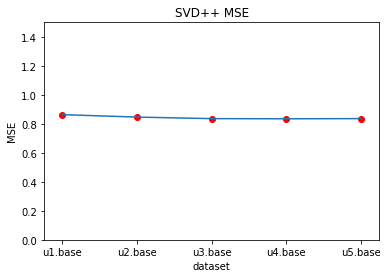

In [0]:
path='/content/drive/My Drive/comp9417-project/SVD++'
file_test_1=[path+"/ml-100k/u1.base",path+"/ml-100k/u2.base",path+"/ml-100k/u3.base",path+"/ml-100k/u4.base",path+"/ml-100k/u5.base"]
file_test_2=[path+"/ml-100k/u1.test",path+"/ml-100k/u2.test",path+"/ml-100k/u3.test",path+"/ml-100k/u4.test",path+"/ml-100k/u5.test"]
file_test_3=["u1.test","u2.test","u3.test","u4.test","u5.test"]
MSE=[]
for i in range(len(file_test_1)):
    train_data,test_data=get_train_test_input(file_test_1[i],file_test_2[i])
    a=SVDpp(train_data)
    a.train(steps=30,gamma=0.04,Lambda=0.15)
    MSE.append(a.test(test_data))
import matplotlib.pyplot as plt
plt.plot(file_test_3,MSE)
plt.scatter(file_test_3,MSE,color='red')
plt.xlabel("dataset")
plt.ylabel("MSE")
plt.ylim(0,1.5)
plt.title('SVD++ MSE')
plt.savefig(path+'/SVD++_mse-fig.jpg')
plt.show()

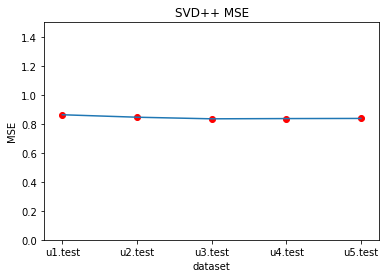

In [0]:
import matplotlib.pyplot as plt
file_test_1=["u1.base","u2.base","u3.base","u4.base","u5.base"]
file_test_2=["u1.test","u2.test","u3.test","u4.test","u5.test"]
MSE=[0.8626269606542293,
 0.8456471760721901,
 0.834606892128331,
 0.8362647714430135,
 0.8372349627099386]
plt.plot(file_test_2,MSE)
plt.scatter(file_test_2,MSE,color='red')
plt.xlabel("dataset")
plt.ylabel("MSE")
plt.ylim(0,1.5)
plt.title('SVD++ MSE')
plt.savefig(path+'/SVD++_mse-fig.jpg')
plt.show()

In [0]:
np.mean(np.sqrt(MSE))

0.9182833391266764

In [0]:
np.mean(MSE)

0.8432761526015404